#***PNEUMONIA DETECTION***

## Dataset is downloaded from kaggle, you can find the dataset in this link: [See Dataset](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import os

In [17]:
labels = ['PNEUMONIA','NORMAL']
img_resize = 150

def get_data(dir):
  data = []
  for label in labels:
    path = os.path.join(dir, label)
    class_num = labels.index(label)

    for img in os.listdir(path):
      try:
        if img.endswith('jpeg'):
          img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
          resized_arr = cv2.resize(img_arr, (img_resize, img_resize))
          data.append([resized_arr, class_num])
      except Exception as e:
        print(e)
  return np.array(data,dtype= 'object')

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
train = get_data('/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/train')
test = get_data('/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/test')
val = get_data('/content/drive/MyDrive/ML_Project_Pneumonia_detection/chest_xray/val')

<Axes: xlabel='count'>

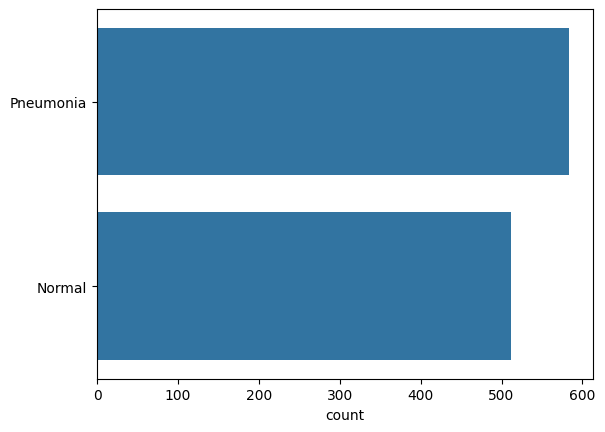

In [20]:
l = []
for i in train:
  if (i[1] == 0):
    l.append('Pneumonia')
  else:
    l.append('Normal')

sns.countplot(l)

Text(0.5, 1.0, 'NORMAL')

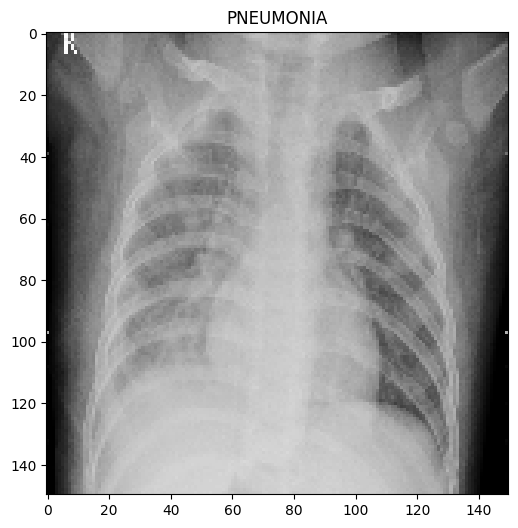

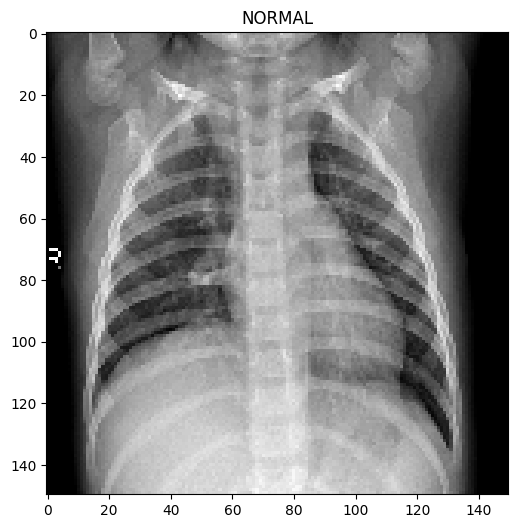

In [21]:
plt.figure(figsize=(6,6))

plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize=(6,6))

plt.imshow(train[-11][0], cmap='gray')
plt.title(labels[train[-11][1]])

In [22]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feat, label in train:
  x_train.append(feat)
  y_train.append(label)

for feat,label in val:
  x_val.append(feat)
  y_val.append(label)

for feat, label in test:
  x_test.append(feat)
  y_test.append(label)

In [23]:
#Normalize the data
x_train = np.array(x_train)/255
x_val = np.array(x_val)/255
x_test = np.array(x_test)/255

In [24]:
x_train

array([[[0.18823529, 0.2       , 0.18039216, ..., 0.21568627,
         0.2       , 0.17647059],
        [0.17254902, 0.17254902, 0.20784314, ..., 0.22352941,
         0.2       , 0.18039216],
        [0.19215686, 0.18431373, 0.2       , ..., 0.23137255,
         0.21568627, 0.25490196],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.24705882, 0.27843137, 0.2627451 , ..., 0.68235294,
         0.80784314, 0.8745098 ],
        [0.29019608, 0.29411765, 0.30588235, ..., 0.6745098 ,
         0.80784314, 0.8745098 ],
        [0.27843137, 0.3254902 , 0.33333333, ..., 0.67843137,
         0.81568627, 0.87843137],
        ...,
        [0.        , 0.        , 0.        , ..., 0.03921569,
         0.22745098, 0.54509804],
        [0. 

In [25]:
x_train = x_train.reshape(-1,img_resize, img_resize,1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1,img_resize,img_resize,1)
y_val = np.array(y_val)


x_test = x_test.reshape(-1,img_resize,img_resize,1)
y_test = np.array(y_test)


In [26]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip=True,
    vertical_flip=False
)

datagen.fit(x_train)

#TRAINING THE MODEL

In [27]:
model = Sequential()
model.add(Conv2D(32,(3,3), strides =1, padding='same', activation='relu', input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(64,(3,3), strides =1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(64,(3,3), strides =1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(128,(3,3), strides =1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Conv2D(256,(3,3), strides =1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy']) #rmsprop
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 38, 38, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 38, 38, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 19, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [28]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.3,min_lr=0.000001)

In [29]:
history = model.fit(x_train,y_train,batch_size=32,epochs=18,
                    validation_data=datagen.flow(x_val,y_val),
                    callbacks=[learning_rate_reduction])

Epoch 1/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7645 - loss: 3.3155

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7675 - loss: 3.2610 - val_accuracy: 0.5000 - val_loss: 4.6246 - learning_rate: 0.0010
Epoch 2/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9353 - loss: 0.3381 - val_accuracy: 0.5000 - val_loss: 3.5040 - learning_rate: 0.0010
Epoch 3/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9527 - loss: 0.1453
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
35/35 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9526 - loss: 0.1459 - val_accuracy: 0.5000 - val_loss: 10.0100 - learning_rate: 0.0010
Epoch 4/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9758 - loss: 0.1176 - val_accuracy: 0.5000 - val_loss: 11.7397 - learning_rate: 3.0000e-04
Epoch 5/18
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9899 - loss: 0.0333
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
35/35 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.9899 - loss: 0.0332 - val_accuracy: 0.5000 

In [30]:
model.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - accuracy: 0.7807 - loss: 3.4669


[7.1194586753845215, 0.5263158082962036]

In [31]:
print(f"Loss of the model is {model.evaluate(x_test,y_test)[0]}")
print(f"Accuracy of the model is {model.evaluate(x_test,y_test)[1]*100} %")

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 587ms/step - accuracy: 0.7807 - loss: 3.4669
Loss of the model is 7.1194586753845215
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 383ms/step - accuracy: 0.7807 - loss: 3.4669
Accuracy of the model is 52.63158082962036 %


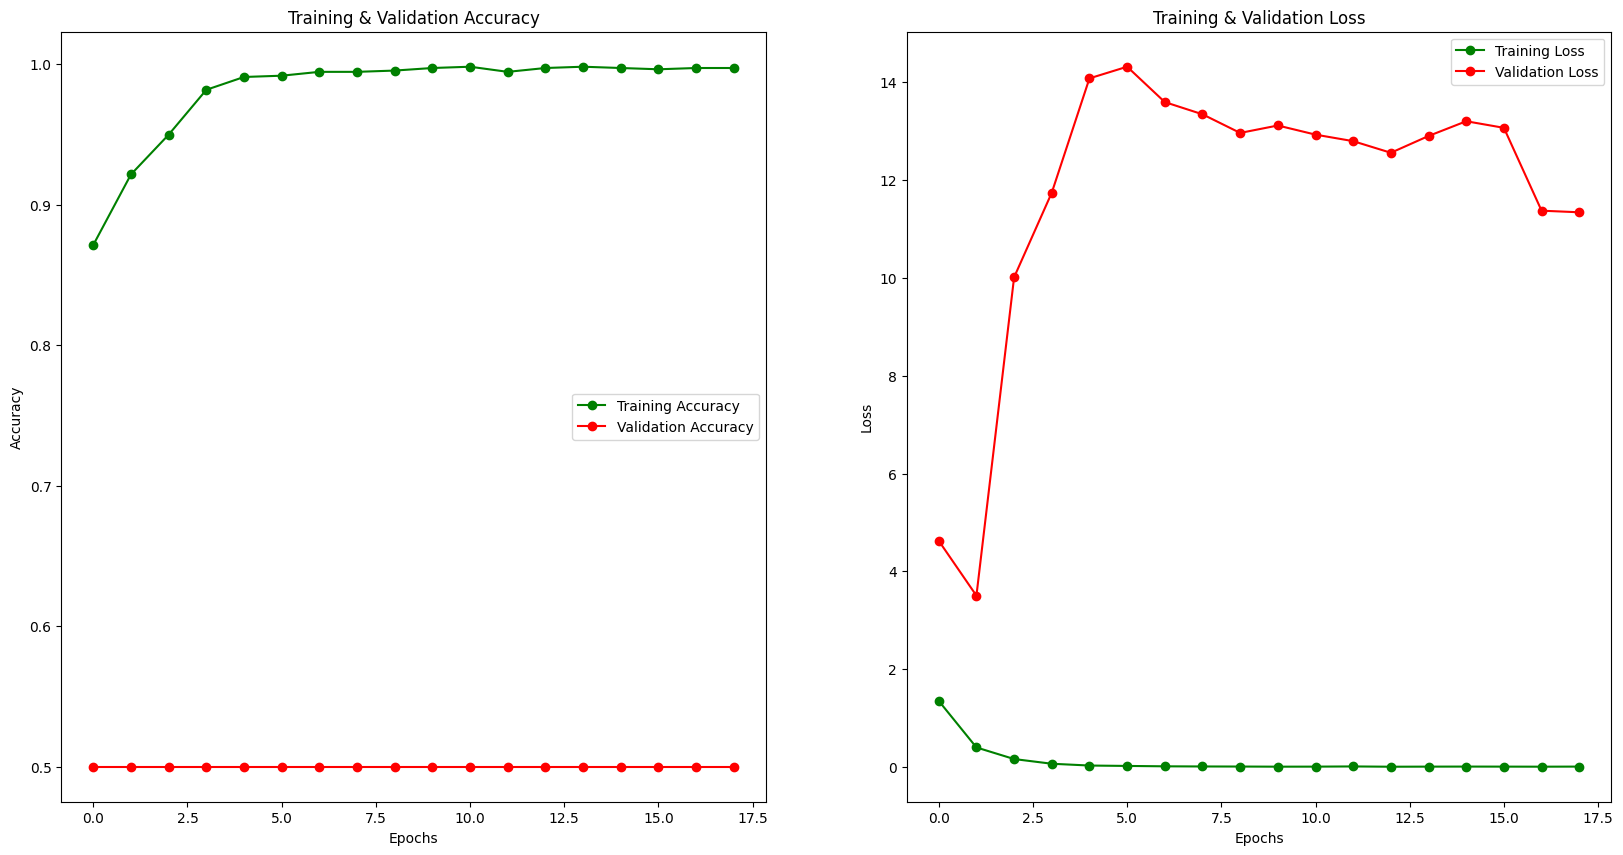

In [32]:
epochs = [i for i in range(18)]
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.set_size_inches(20,10)

ax[0].plot(epochs, train_acc, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')


ax[1].plot(epochs, train_loss, 'g-o', label='Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
plt.show()

In [ ]:
predictions = (model.predict(x_test) > 0.5).astype('int32')
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

In [34]:
print(classification_report(y_test, predictions, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.52      1.00      0.68       136
   Normal (Class 1)       1.00      0.03      0.06       130

           accuracy                           0.53       266
          macro avg       0.76      0.52      0.37       266
       weighted avg       0.75      0.53      0.38       266



In [ ]:
cm = confusion_matrix(y_test,predictions)

In [36]:
cm

array([[136,   0],
       [126,   4]])

In [37]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

##SOME CORRECTLY PREDICTED CLASSES

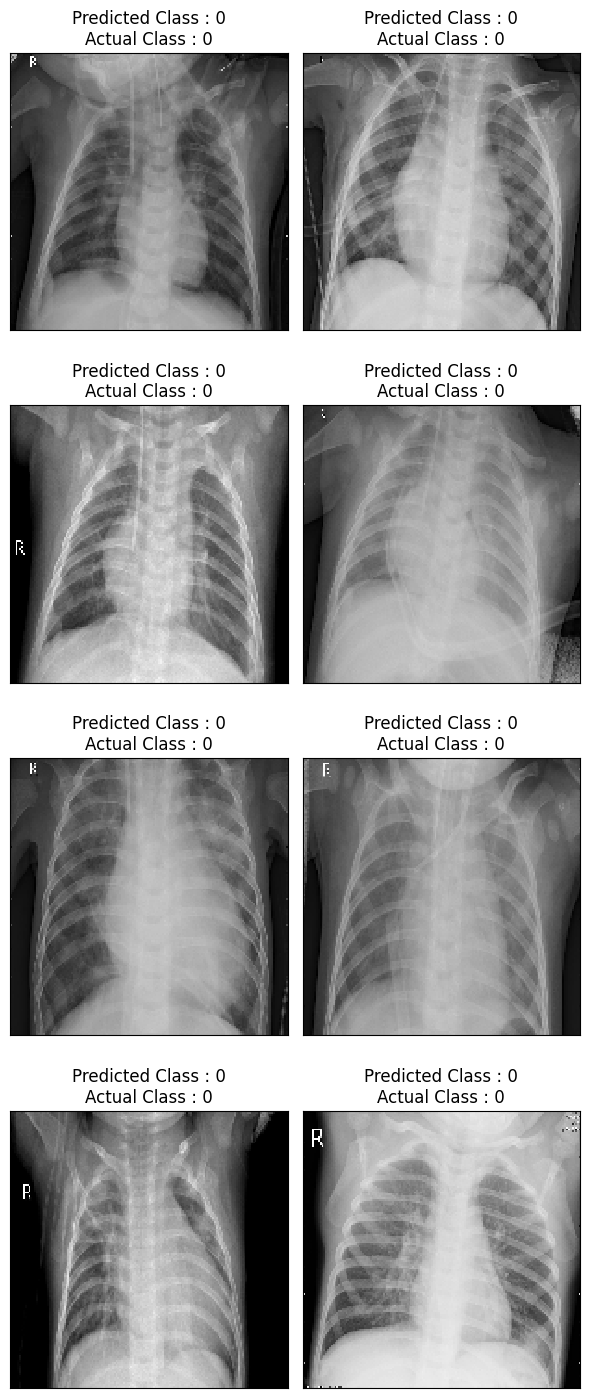

In [38]:
i = 0
plt.figure(figsize=(6,15))
for c in correct[10:18]:
  plt.subplot(4,2,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[c].reshape(150,150), cmap='gray', interpolation='none')
  plt.title(f"Predicted Class : {predictions[c]}\nActual Class : {y_test[c]}")
  plt.tight_layout()
  i += 1

##SOME INCORRECTLY PREDICTED CLASSES

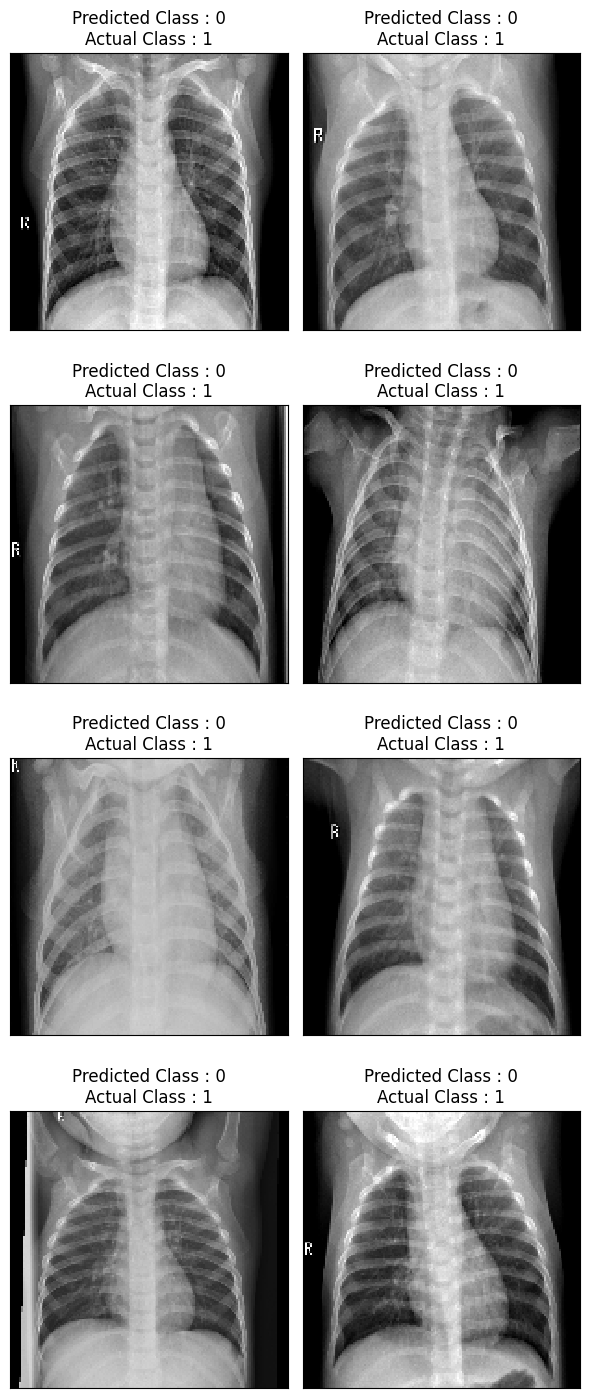

In [39]:
i = 0
plt.figure(figsize=(6,15))
for c in incorrect[10:18]:
  plt.subplot(4,2,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[c].reshape(150,150), cmap='gray', interpolation='none')
  plt.title(f"Predicted Class : {predictions[c]}\nActual Class : {y_test[c]}")
  plt.tight_layout()
  i += 1